## Student Name: Boyan Li
## Student ID: 230109586
## The project I attempted was: (3) Text


In [5]:
# Make the datasets avaliable in Google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CSC8111 Coursework Specification

For this coursework you will perform **THREE** short questions which cover the breadth of the machine learning module along with attempting **ONE** of the four longer project-style questions. All of the short tasks and longer project-style questions can be found in this notebook. You should provide all of your answers in this notebook and submit it to Canvas before the submission deadline.

The learning objectives of these short questions are:
- To demonstrate a wide-range of machine learning skills.
- To be able to apply the most appropriate approach at the right time.



---
## Question 1: Classification (10 marks)

Load the dataset below, where X and y are the feature (input) variables and target (output) variable. Based on this dataset, build TWO classifiers using different machine learning approaches to predict the two classes in the target variable. You are free to use any appropriate machine learning models and libraries, but you need to split the dataset into training and test sets and optimise the model's hyperparameters (e.g. using GridSearchCV()). As a result, the performance metrics of the best classifier should be reported over the test set. Please follow the steps below to complete the code.

The dataset is available at:
https://ncl.instructure.com/courses/53509/files/7659751?wrap=1 and
https://ncl.instructure.com/courses/53509/files/7659755?wrap=1


## Set up the environment and load the dataset

In [7]:
# just run this cell, don't change the code
import numpy as np
from numpy import loadtxt
X = loadtxt('/content/drive/MyDrive/Colab Notebooks/cls_X.csv', delimiter=',')
# print(X)
y = loadtxt('/content/drive/MyDrive/Colab Notebooks/cls_y.csv', delimiter=',')
# print(y)

## Q1.1 Split the data into training and test sets (20% for testing)

In [8]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

Answer: The above code will divide the dataset into training set and test set. 80% of the data is used for training and 20% for testing. The random_state parameter ensures that the split is reproducible, can be set to any integer value.

## Q1.2 Create your first classifier

#### Q1.2.1 First, make an attempt by using an appropriate machine learning method without optimising the hyperparameter(s). Report the model accuracy over the test set (i.e. test accuracy).

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Without hyperparameter optimization
clf = KNeighborsClassifier()                            # Creating the KNN classifier
y_train=y_train.ravel()                                 # Guaranteed y_train to be a one-dimensional array
clf.fit(X_train, y_train)                               # Fitting the classifier to the training set
y_pred = clf.predict(X_test)                            # Making predictions on the test set
accuracy = accuracy_score(y_test, y_pred)               # Calculating and reporting the accuracy
print(f"KNN Test Accuracy: {accuracy}")

KNN Test Accuracy: 0.825


#### Q1.2.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your first classifier and print out its test accuracy.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

# Fit the GridSearchCV object on scaled data
grid_search.fit(X_train_scaled, y_train)

# Retrieve results found during grid search
best_params = grid_search.best_params_
best_knn_clf = grid_search.best_estimator_

# Make predictions on scaled test set
y_pred_best_knn = best_knn_clf.predict(X_test_scaled)

# Calculate and report accuracy
best_accuracy_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Best Hyperparameters: {best_params}")
print(f"Best KNN Test Accuracy: {best_accuracy_knn}")

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best KNN Test Accuracy: 0.875


## Q1.3 Create your second classifier

#### Q1.3.1 First, without optimising the hyperparameter(s), make an attempt by using a different machine learning method to the first classifier. Report the model accuracy over the test set (i.e. test accuracy).

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Without hyperparameter optimization
clf = RandomForestClassifier()                          # Creating the KNN classifier
clf.fit(X_train, y_train)                               # Fitting the classifier to the training set
y_pred = clf.predict(X_test)                            # Making predictions on the test set
accuracy = accuracy_score(y_test, y_pred)               # Calculating and reporting the accuracy
print(f"RandomForest Test Accuracy: {accuracy}")

RandomForest Test Accuracy: 0.8125


#### Q1.3.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your second classifier and print out its test accuracy.



In [12]:
# Hyperparameter optimization
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_rf_clf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_clf.predict(X_test)
best_accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Test Accuracy: {best_accuracy_rf}")
print(f"Best Hyperparameters: {best_params_rf}")

Best Random Forest Test Accuracy: 0.8625
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


## Q1.4 Report the precision, recall, f1 score and confusion matrix on the best of the two classifiers

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate performance metrics
precision = precision_score(y_test, y_pred_best_rf)
recall = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Precision: 0.8048780487804879
Recall: 0.8918918918918919
F1 Score: 0.8461538461538461
Confusion Matrix:
[[35  8]
 [ 4 33]]


---
## Question 2: Regression (10 marks)

In this question you are given a simple dataset which you will perform regression on to predict values. You will build TWO Regression models and then take the best one and perform hyperparameter tuning on it.

## Set up the environment

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

## Read in the data

You'll need to download the data.csv file from https://ncl.instructure.com/courses/53509/files/7657710?wrap=1 and upload it to your Google Drive. I placed it in a folder called data. Then you need to mount your Google Drive in Colab (cell below).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then read in the data

In [ ]:
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/data.csv', delimiter=',')
print(data)

[[1.00000000e+00 9.00000000e+00 2.57259990e+00 2.49788633e+02]
 [1.00000000e+00 5.00000000e+00 9.21413366e+00 5.04502032e+02]
 [1.00000000e+00 1.70000000e+01 7.12330090e+00 1.33580225e+03]
 ...
 [5.00000000e+00 3.10000000e+01 6.80121067e+00 3.15979690e+03]
 [5.00000000e+00 1.00000000e+01 4.14995662e+00 6.21315789e+02]
 [5.00000000e+00 9.00000000e+00 9.61878173e+00 1.30105857e+03]]


## Q2.1 Split the data into X and y

X is the first three columns

y is the last column

In [ ]:
# Split the data into features X and target variable y
X = data[:, :3]  # The first three columns are used as features
y = data[:, 3]   # The last column is used as the target variable

# print(X)
# print(y)

## Q2.2 Create the Train and Test datasets

20% of the data is kept back for testing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)

## Q2.3 Use TWO Regression approaches on the dataset

In each case report the R^2 value against the test data.

Q2.3.1 Regression approach 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)  # Train the model
y_pred_lr = lr.predict(X_test)  # Make predictions
r2_lr = r2_score(y_test, y_pred_lr)  # Calculate the R^2 score
print(f"Linear Regression R^2: {r2_lr}")

Linear Regression R^2: 0.8389230726412951


Q2.3.2 Regression approach 2

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree regression model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)  # Train the model
y_pred_dtr = dtr.predict(X_test)  # Make predictions
r2_dtr = r2_score(y_test, y_pred_dtr)  # Calculate the R^2 score
print(f"Decision Tree Regression R^2: {r2_dtr}")

Decision Tree Regression R^2: 0.978061539461458


## Q2.4 Optimise the hyperparameters

Take your best Regression approach from above and identify the best hyperparameters. Note as some Regression approaches have many hyperparameters you may limit yourself here to just THREE.

Q2.4.1 Search for the best hyperparameters

In [ ]:
# Define a parameter grid for the Decision Tree Regressor
param_grid_dtr = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Use GridSearchCV
grid_search_dtr = GridSearchCV(DecisionTreeRegressor(), param_grid_dtr, cv=5)
grid_search_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

Q2.4.2 Output the best hyperparameters found

In [ ]:
# Get the best hyperparameters for the Decision Tree Regressor
best_params_dtr = grid_search_dtr.best_params_
print(f"Best Hyperparameters for Decision Tree Regressor: {best_params_dtr}")

Best Hyperparameters for Decision Tree Regressor: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


Q2.4.3 Show the results for the best model

In [ ]:
# Use the best model for predictions
best_dtr = grid_search_dtr.best_estimator_
y_pred_best_dtr = best_dtr.predict(X_test)
r2_best_dtr = r2_score(y_test, y_pred_best_dtr)
print(f"Best Decision Tree Regressor Model R^2: {r2_best_dtr}")

Best Decision Tree Regressor Model R^2: 0.9795815072664684


---
## Question 3: Deep Learning (10 marks)

Q3.1 For MNIST dataset, implement a deep learning model with 3 hidden layers with layer size: 128, 256, 50.


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
import keras.utils as utils

batch_size = 128
nb_classes = 10
im_dim = 784 # the total pixel number
nb_epoch = 2

In [27]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, im_dim)
X_test = X_test.reshape(10000, im_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

11490434/11490434 [==============================] - 0s 0us/step


In [28]:
# Write down your code about MLP model for question Q3.1 here
# you should call your model 'model'
# ...
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(im_dim,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(nb_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Add code to output your network structure

In [29]:
# your code here
model.summary()
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                12850     
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 146864 (573.69 KB)
Trainable params: 14686

Train the model for just two epochs to show it works. All code provided - just run.

In [30]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch,
                    validation_split = 0.2,
                    batch_size=batch_size, verbose=1)

# Evaluate
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

Epoch 1/2
375/375 [==============================] - 4s 8ms/step - loss: 0.6505 - accuracy: 0.7922 - val_loss: 0.2209 - val_accuracy: 0.9349
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.1534 - accuracy: 0.9534
Summary: Loss over the test dataset: 0.15, Accuracy: 0.95


Q 3.2 For MNIST dataset, implement a CNN model with only one 2D CNN layer as the hidden layer.

In [31]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [32]:
# Write down your code about the CNN model of Q3.2 here
# you should call your model 'model'
# ...
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Add code to output your network structure

In [33]:
# your code here
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout_22 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                      

We just train for two epochs to demonstrate that the network does work. Just run it.

In [34]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True,
              validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

Epoch 1/2
375/375 [==============================] - 28s 74ms/step - loss: 2.2767 - accuracy: 0.1483 - val_loss: 2.2431 - val_accuracy: 0.2607
Epoch 2/2
375/375 [==============================] - 28s 75ms/step - loss: 2.2365 - accuracy: 0.2078 - val_loss: 2.1989 - val_accuracy: 0.4072
Summary: Loss over the test dataset: 2.20, Accuracy: 0.42


---
---
---
#Mini-projects: Introduction

The remainder of this document defines four project-style questions which go more deeply into one of the areas from the module. You should pick **ONE** of these project-stye questions to answer.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with a choice of four different datasets of different nature
1. A tabular dataset (defined as a classification problem)
2. An image dataset
3. A text dataset
4. A time series dataset

Your job is easy to state: You should pick ONE out of these four options and design a range of machine learning pipelines appropriate to the nature of each of the selected datasets. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report should have 1000 to 2000 words. The word count excludes references, tables, figures and section headers, and has a 10% leeway.

## Marking scheme

- Writing Style, references, figures, etc. 7 marks
- Dataset exploration 7 marks
- Methods 21 marks
- Results of analysis 21 marks
- Discussion 14 marks

---
---
## Project 1: Tabular dataset (70 marks)

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/53509/files/7652449/download?download_frd=1

Experiments on the tabular dataset will be relatively fast compared to the other three options. To compensate, we expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models, hyperparameter tuning and cross-validation evaluation.

## Your answer below

---
---
## Project 2: Image dataset (70 marks)

The FMNISTMash dataset is an extension to the FMNIST dataset. In each 3-colour channel image there is one FMNIST image in each channel (see example below). The idea is to predict the number of unique classes in the three channels (0 - all images are of the same class, 1 - two different classes, 2 - three different classes). So for the example image there is a top and two jackets so lable is 1. Please download the data from:

|Data| URL|
|---|------|
|Train X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_x.npy |
| Train y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_x.npy |
| Validate X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_x.npy |
| Validate y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_y.npy |
| Test X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_x.npy |
| Test y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_y.npy |

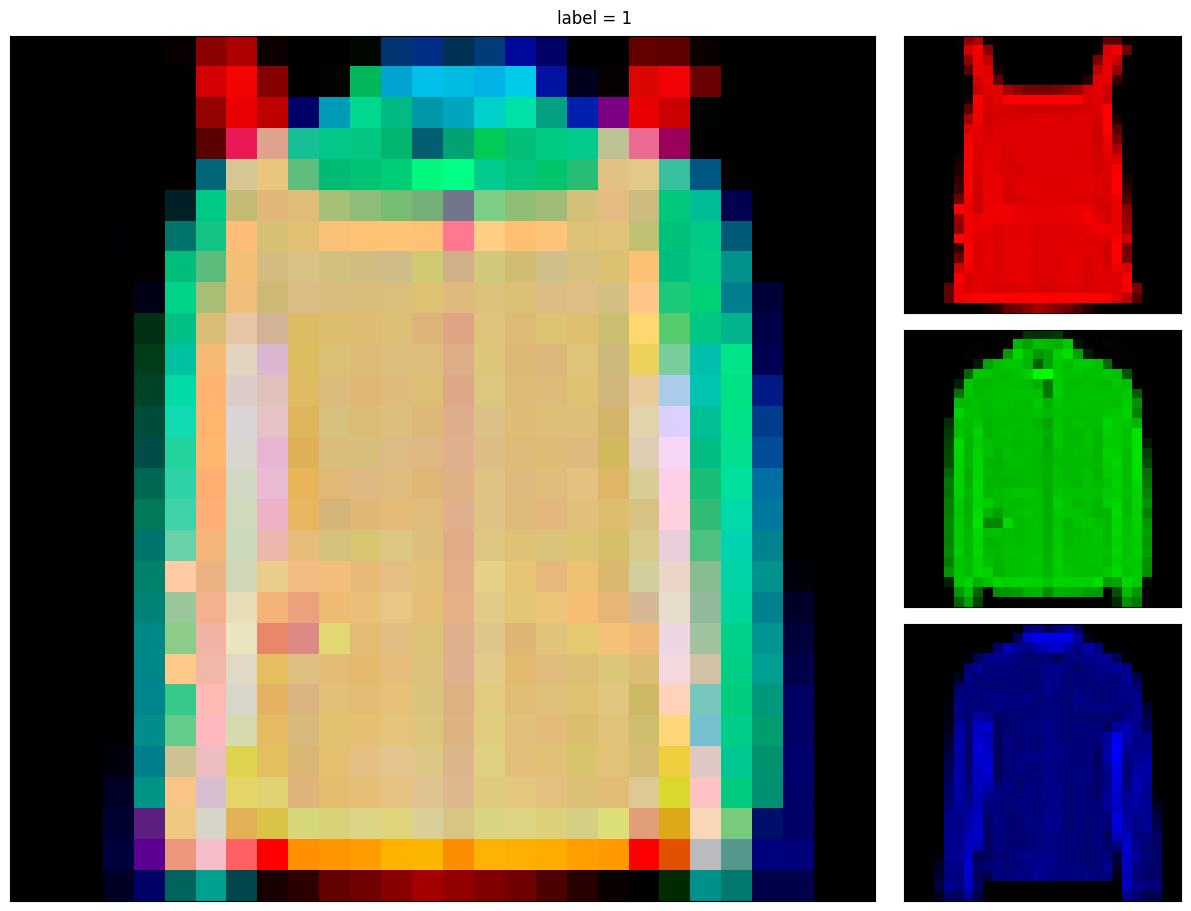
Figure 1: Example image from the FMNISTMash dataset, class label is 1

Your task is to produce TWO models for predicting the class of the image. Note: you can do ONE model which splits the image into its separate colour channels and performs a classification on them separately, but the other MUST work on all three chanels together.

Some hints:
- The code below shows you how to load and view the data.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it. Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

To load the data, we reccomend storing it in your Google Drive, this means you won't need to load it into the local colab storage every time you open the notebook.

The following import will allow your notebook to connect to Google Drive. When you run this cell a seperate window will pop up asking you to grant Drive access to colab. Grant it access to the account which contains FMNISTMash

## Load the data

The dataset is stored as six Numpy files, so to load them we will need to import Numpy. Before loading each file into its own vaiable.

**Note: you'll need to change the location of the file to wherever you stroed your files.**

In [ ]:
import numpy as np

train_x = np.load('/content/drive/MyDrive/data/FMNISTMash/train_x.npy', allow_pickle = True)
train_y = np.load('/content/drive/MyDrive/data/FMNISTMash/train_y.npy', allow_pickle = True)
valid_x = np.load('/content/drive/MyDrive/data/FMNISTMash/valid_x.npy', allow_pickle = True)
valid_y = np.load('/content/drive/MyDrive/data/FMNISTMash/valid_y.npy', allow_pickle = True)
test_x = np.load('/content/drive/MyDrive/data/FMNISTMash/test_x.npy', allow_pickle = True)
test_y = np.load('/content/drive/MyDrive/data/FMNISTMash/test_y.npy', allow_pickle = True)

## Check the shape of the data
Make sure the data is loaded and in the shape that you expect, FMNISTMash has 50,000 training images, 10,000 validation images, and 10,000 testing images.

In [ ]:
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')
print(f'valid_x shape: {valid_x.shape}')
print(f'valid_y shape: {valid_y.shape}')
print(f'test_x shape: {test_x.shape}')
print(f'test_y shape: {test_y.shape}')

train_x shape: (50000, 3, 28, 28)
train_y shape: (50000,)
valid_x shape: (10000, 3, 28, 28)
valid_y shape: (10000,)
test_x shape: (10000, 3, 28, 28)
test_y shape: (10000,)


## Displaying the Images

### Displaying the single image

To display the images we are going to be using MatPlotLib, so we need to import that, standard practice is to import it as plt

In [ ]:
import matplotlib.pyplot as plt

The following two functions aren't necessary, they simply remove the axis ticks and numbers from the rendered image and perform some normalisation to the image.

In [ ]:
def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

In [ ]:
def image_normalisation(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

We construct the figure using plt, pyplot expects the colour channel to be last, the data is saved in a channels_first format so needs to be converted which is what we used np.move_axis for.

In [ ]:
def display_image(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)
    plt.show()

## Pick a random example and plot it

We want to plot a random image, so we import random and pick a random index using the number of images in train_x as a limit.

In [ ]:
import random

ri = random.randrange(train_x.shape[0])

We now render the image, the label indicates how many different FMNIST classes appear in the image.

- 0 = All images are the same class
- 1 = Two images share the same class
- 2 = All images are from different classes

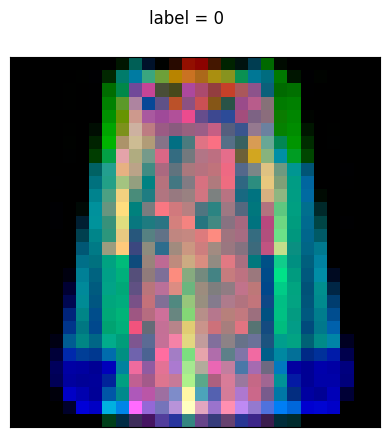

In [ ]:
display_image(train_x[ri], train_y[ri])

## Splitting the Image

This next section is just to make the dataset easier to understand. We will display the image, and then the three images that make it up seperately.

In [ ]:
def show_mnist_examples(x, y):
  fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
  gs = fig.add_gridspec(3,4)
  main_ax = fig.add_subplot(gs[:3,:3])
  fig.suptitle('label = '+ str(y))
  main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
  disable_ax_ticks(main_ax)

  for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalisation(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
  plt.show()

Hopefully, you will see the same image rendered early along with the images in the respective colour channels, and you should be able to see which ones share a class from FMNIST and which ones differ. Careful though, as some classes are similar to others.

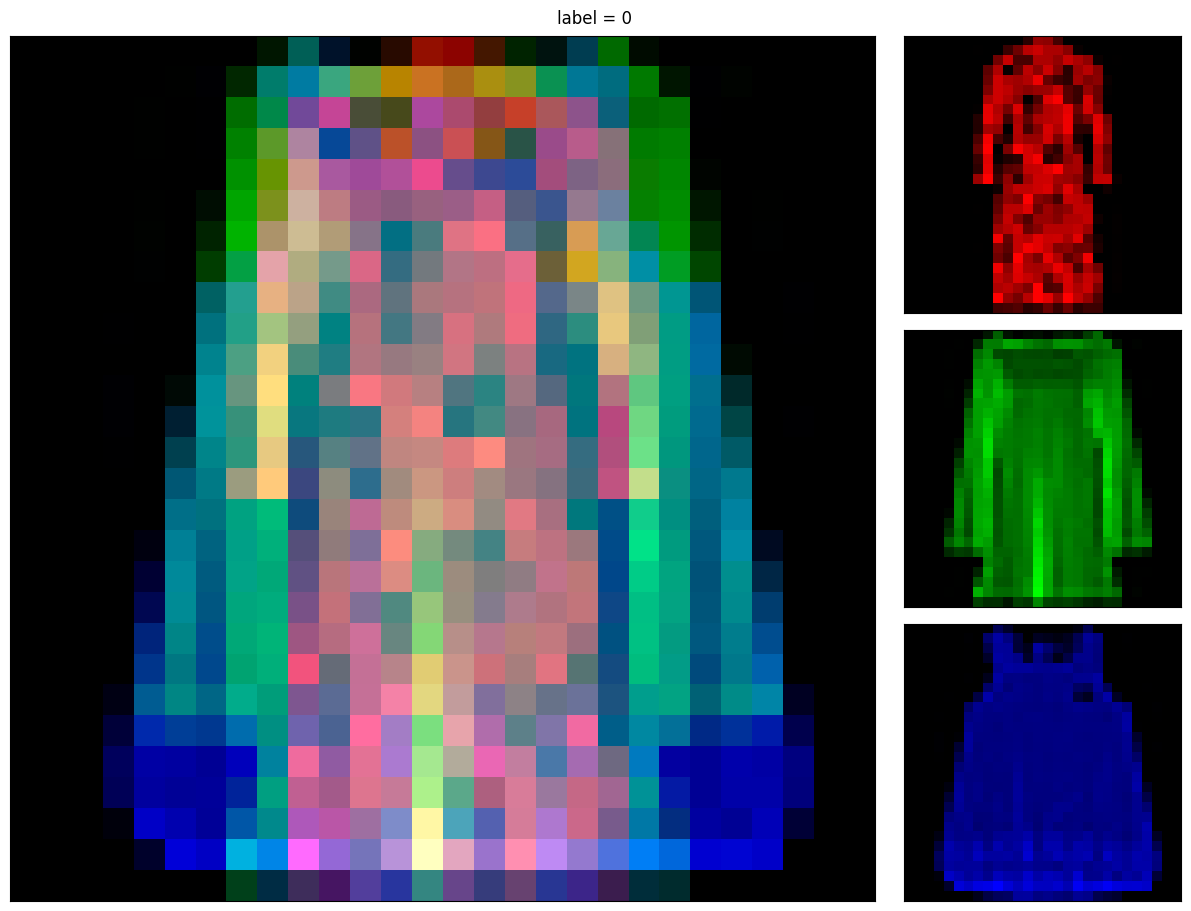

In [ ]:
show_mnist_examples(train_x[ri], train_y[ri])

## Your answer below

---
---
## Project 3: Text dataset (70 marks)

Dataset: sentiment analysis dataset (on canvas: (https://ncl.instructure.com/courses/48554/files/6271480?wrap=1), (https://ncl.instructure.com/courses/48554/files/6271483?wrap=1), (https://ncl.instructure.com/courses/48554/files/6271533?wrap=1)).

Each sample in the dataset represents a tweet. Each tweet has a sentiment label (Positive, Negative, Neutral).

**Task Description:** Apply **a combination of** different approaches including pre-processing techniques, shallow and deep classifiers, ensembled approaches, machine learning approaches beyond supervised learning if applicable, data augmentation if applicable to predict the sentiment of the test set. Try your best to improve the prediction results.

Primary **Evaluation metrics: F-1 measure**. Though you should also use others.


### Part1: Dataset Exploration and Preparation

#### (i) Dataset exploration

- Load dataset, display dataset information, show first few rows of dataset.

- Text length analysis datamining: calculate the length of each tweet text and add as new column `'text_length'`.
- Text length distribution datatisation: use descriptive statistics to show the distribution of the `'text_length'` column.
- Sentiment label distribution visualisation: use Seaborn's `countplot` to visualise the distribution of different sentiment labels in the training set, development set and test set.
- Text length distribution visualisation: draw histograms to show the distribution of text length in the training set, development set and test set.

In [22]:
import pandas as pd

# Load dataset
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets_train.csv', encoding='ISO-8859-1')
dev_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets_dev.csv', encoding='ISO-8859-1')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tweets_test.csv', encoding='ISO-8859-1')

# Display basic information about the datasets
print(train_df.info())
print(dev_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           11858 non-null  int64 
 1   text               11858 non-null  object
 2   airline_sentiment  11858 non-null  object
dtypes: int64(1), object(2)
memory usage: 278.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1318 non-null   int64 
 1   text               1318 non-null   object
 2   airline_sentiment  1318 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0 

In [14]:
# Display the first few rows of the dataset
print(train_df.head())
print(dev_df.head())
print(test_df.head())

             tweet_id                                               text  \
0  569179849518161920                    @united you're good. Thank you!   
1  569835751275433984  @AmericanAir way to ruin a vacation, my brothe...   
2  568588936852799488  @JetBlue yes thankfully! Catering just got her...   
3  569525116725567491  @USAirways The automated message isn't helpful...   
4  568807823187976193  @JetBlue I'm #MakingLoveOutofNothingAtAll on m...   

  airline_sentiment  
0          positive  
1          negative  
2          positive  
3          negative  
4          positive  
             tweet_id                                               text  \
0  568107472260624384  @southwestair Great job celebrating #MardiGras...   
1  568215698524246016  @southwestair thanks for taking it up a notch!...   
2  567842466851905536  @USAirways Being put back on hold for what has...   
3  568834824410148864  @united Thank you for your offer! All sorted o...   
4  569590527349252096  @JetBlue

In [15]:
# Analyze the length of each sample
train_df['text_length'] = train_df['text'].apply(len)
dev_df['text_length'] = dev_df['text'].apply(len)
test_df['text_length'] = test_df['text'].apply(len)

# Display the distribution of lengths
print(train_df['text_length'].describe())
print(dev_df['text_length'].describe())
print(test_df['text_length'].describe())

count    11858.000000
mean       104.355878
std         36.083324
min         12.000000
25%         78.000000
50%        115.000000
75%        136.000000
max        229.000000
Name: text_length, dtype: float64
count    1318.000000
mean      103.352049
std        37.039623
min        13.000000
25%        76.000000
50%       114.000000
75%       136.000000
max       176.000000
Name: text_length, dtype: float64
count    1464.000000
mean      102.885929
std        36.928576
min        15.000000
25%        75.750000
50%       112.000000
75%       136.250000
max       162.000000
Name: text_length, dtype: float64


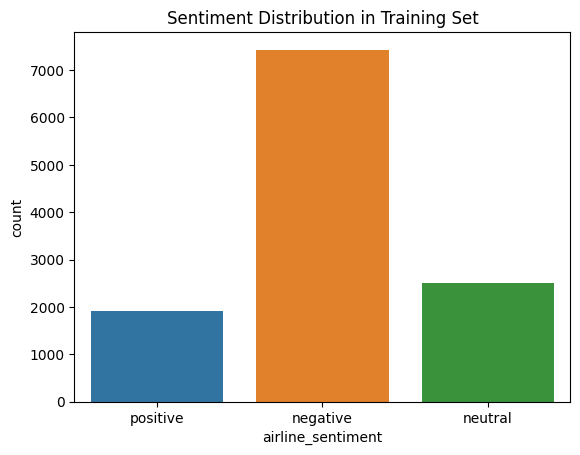

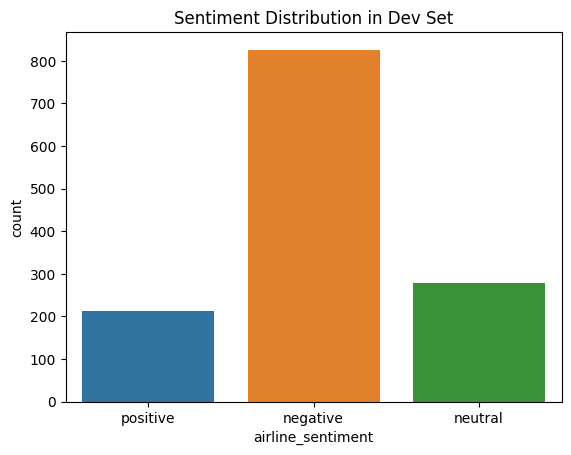

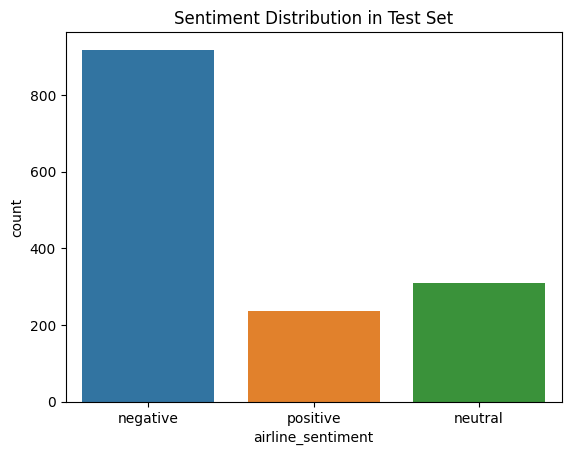

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment label distribution
sns.countplot(x='airline_sentiment', data=train_df)
plt.title('Sentiment Distribution in Training Set')
plt.show()

sns.countplot(x='airline_sentiment', data=dev_df)
plt.title('Sentiment Distribution in Dev Set')
plt.show()

sns.countplot(x='airline_sentiment', data=test_df)
plt.title('Sentiment Distribution in Test Set')
plt.show()

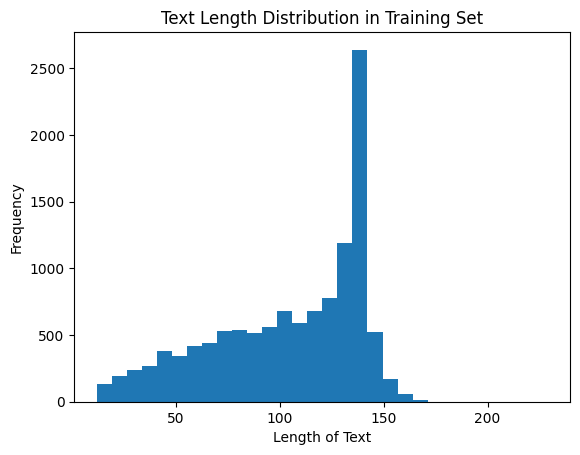

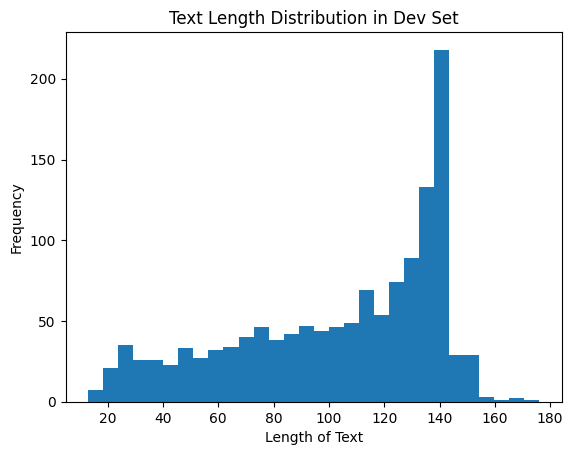

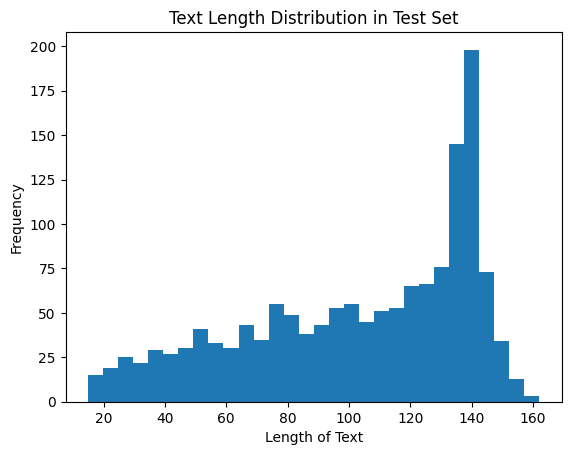

In [17]:
import matplotlib.pyplot as plt

# Text length distribution
plt.hist(train_df['text_length'], bins=30)
plt.title('Text Length Distribution in Training Set')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

plt.hist(dev_df['text_length'], bins=30)
plt.title('Text Length Distribution in Dev Set')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

plt.hist(test_df['text_length'], bins=30)
plt.title('Text Length Distribution in Test Set')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

#### (ii) Data Preprocessing

In order to ensure that the model can capture useful semantic information from the text and to reduce the interference of noise on the model's comprehension ability, we implemented the following preprocessing steps on the `text` columns in all datasets:

1. **Lowercaseisation**: convert all text content to lowercase.
2. **Remove specific characters and patterns**:
   - **Remove mentions**: remove all mentions in the form of `@username`, as these usernames do not contribute substantially to the task of sentiment analysis and they are extremely variable and may introduce noise.
   - **Tag cleanup**: remove all topic tags of the form `#tag`. Although they can sometimes provide contextual information, in this analysis we decided to exclude their potential impact on the model.
   - **link elimination**: remove all URL links, these usually start with `http`. These links do not contain information about affective tendencies needed for sentiment analysis.
   - **Non-English Character Filtering**: removes all non-English characters, with the option of removing emoticons in consideration of their possible polysemy in different cultural contexts.

In [18]:
import re
import string

def preprocess_text(text):
    # Data preprocessing section
    # Removing non-semantic parts
    text = text.lower()
    text = re.sub(r'@\w+', '', text)           # Remove @mentions
    text = re.sub(r'#\w+', '', text)           # Remove #hashtags.
    text = re.sub(r'http\S+', '', text)        # Remove URLs (http...).
    text = re.sub(r'\d+', '', text)            # Remove numbers.
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove meaningless non-ASCII characters
    return text

# Apply the preprocessing function to the 'text' column of each dataset and add a "text_clean" column to store the preprocessed data
train_df['text_clean'] = train_df['text'].apply(preprocess_text)
dev_df['text_clean'] = dev_df['text'].apply(preprocess_text)
test_df['text_clean'] = test_df['text'].apply(preprocess_text)

# Check the output: Display the first few rows of each dataset to see the data preprocessing results
# train_df
print("Train")
print(train_df['text'].head())
print(train_df['airline_sentiment'].head())
print(train_df['text_clean'].head())
print()

# dev_df
print("Dev")
# print(dev_df['text'].head())
print(dev_df['airline_sentiment'].head())
print(dev_df['text_clean'].head())
print()

# test_df
print("Test")
# print(test_df['text'].head())
print(test_df['airline_sentiment'].head())
print(test_df['text_clean'].head())

Train
0                      @united you're good. Thank you!
1    @AmericanAir way to ruin a vacation, my brothe...
2    @JetBlue yes thankfully! Catering just got her...
3    @USAirways The automated message isn't helpful...
4    @JetBlue I'm #MakingLoveOutofNothingAtAll on m...
Name: text, dtype: object
0    positive
1    negative
2    positive
3    negative
4    positive
Name: airline_sentiment, dtype: object
0                              you're good. thank you!
1     way to ruin a vacation, my brother has called...
2     yes thankfully! catering just got here and no...
3     the automated message isn't helpful and it's ...
4                                     i'm  on my  to  
Name: text_clean, dtype: object

Dev
0    positive
1    positive
2    negative
3    positive
4     neutral
Name: airline_sentiment, dtype: object
0     great job celebrating  .  you own the industr...
1     thanks for taking it up a notch!! leinenkugel...
2     being put back on hold for what has now been ..

#### (III) Feature Extraction

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text_clean'])
X_dev_tfidf = tfidf_vectorizer.transform(dev_df['text_clean'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['text_clean'])

# print(X_train_tfidf)
# print(X_dev_tfidf)
# print(X_test_tfidf)


After completing data cleaning, the text needs to be converted into a numerical format suitable for machine learning model processing. Through the TF-IDF technique", the weight of common words is reduced and the weight of rare words is enhanced to improve the model's ability to capture key information in the text, which is used as a dataset feature extraction strategy for the baseline model and the model of medium complexity. (Addendum: TF-IDF is a statistical method for assessing the importance of words to a document set or one of the documents in a corpus.)



In the above code snippet: a `TfidfVectorizer` object is instantiated, and the `max_features` parameter is set to 10000, which sets the model to consider only the top 10000 most important words in the dataset, thus reducing the computational complexity while maintaining enough feature coverage to capture the key information in the text.


Then, the `fit_transform` method is called to train the vectoriser and transform the training set text `train_df['text_clean']` into a TF-IDF matrix `X_train_tfidf`. And using the same vectoriser (keeping the vocabulary learned during training unchanged) the same transformation operation is performed on the development set `dev_df['text_clean']` and the test set `test_df['text_clean']`, generating `X_dev_tfidf` and `X_test_tfidf`.


Eventually, these three matrices `X_train_tfidf`, `X_dev_tfidf` and `X_test_tfidf` will be used for subsequent model training. As well as for deep learning models, the data labels are further processed separately instead of using TF-IDF.

### Part2: Alternative Model Selection, Training, Validation, and Evaluation

Contains three main parts:
1. Alternative model selection
2. Alternative model training and validation: performed using default hyperparameters
3. Alternative model evaluation: evaluating the F1-Measure values of each model using the development dataset.


#### (i) Alternative model selection

In the model selection phase, the idea is to try to consider different levels of models to get a wider coverage of the test results. Where baseline level models provide results quickly, medium complexity models provide a balance between performance and computational cost, and deep learning models are computationally expensive but usually achieve the best performance.

Therefore one of each of the level models is selected for further training and validation:
1. Baseline Model - Logistic Regression: is a simple and widely used classification algorithm that typically provides a strong baseline on a variety of text classification tasks.
2. Medium complexity model - Support Vector Machine (SVM): usually performs well on textual data and performs classification by finding optimal boundaries between data classes.
3. Deep learning model - Transformer model (DistilBERT): BERT is a relatively mature model based on a large amount of data pre-training, usually able to quickly achieve a high level of accuracy on a smaller amount of custom data, DistilBERT is a lighter version of BERT, which can maintain the performance of the original BERT model while reducing the size and computational requirements, which is more suitable for GNU. DistilBERT is a lightweight version of BERT that maintains the performance of the original BERT model while reducing the model size and computation requirements, which is more suitable for Google-colab's operating environment.

#### (ii) Alternative model training and validation: using default hyperparameters

In the training and validation section, `train_df` is used to train the models, and `dev_df is used for model performance evaluation (F1 score).

##### 1. Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=0)
# Train the model
lr_model.fit(X_train_tfidf, train_df['airline_sentiment'])

# Evaluate F1 score on the development set
lr_predictions = lr_model.predict(X_dev_tfidf)
lr_f1 = f1_score(dev_df['airline_sentiment'], lr_predictions, average='macro')
print(f'Logistic Regression F1 Score on Dev Set: {lr_f1}')

Logistic Regression F1 Score on Dev Set: 0.7040136246547096


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#####2. Support Vector Machine (SVM)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1, random_state=0)
# Train the model
svm_model.fit(X_train_tfidf, train_df['airline_sentiment'])

# Evaluate F1 score on the development set
svm_predictions = svm_model.predict(X_dev_tfidf)
svm_f1 = f1_score(dev_df['airline_sentiment'], svm_predictions, average='macro')
print(f'Support Vector Machine F1 Score on Dev Set: {svm_f1}')

Support Vector Machine F1 Score on Dev Set: 0.7154012314017267


##### 3. Deep learning model - Transformer model (DistilBERT)

In [20]:
!pip install transformers

In [21]:
import tensorflow as tf
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize DistilBERT tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize and encode sequences in the training set
train_encodings = tokenizer(train_df['text_clean'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev_df['text_clean'].tolist(), truncation=True, padding=True, max_length=128)

# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['airline_sentiment'])
dev_labels = label_encoder.transform(dev_df['airline_sentiment'])

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, num_classes=3)
dev_labels = to_categorical(dev_labels, num_classes=3)

# Convert encoded labels to Tensorflow datasets
train_dataset = (
    tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels))
    .shuffle(buffer_size=len(train_labels))
    .batch(32)
)
dev_dataset = (
    tf.data.Dataset.from_tensor_slices((dict(dev_encodings), dev_labels))
    .batch(32)
)

# Load the TensorFlow DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train the model
history = model.fit(train_dataset, epochs=3, validation_data=dev_dataset)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/3
371/371 [==============================] - 4108s 11s/step - loss: 0.4956 - accuracy: 0.7982 - val_loss: 0.4463 - val_accuracy: 0.8240
Epoch 2/3
371/371 [==============================] - 3971s 11s/step - loss: 0.3060 - accuracy: 0.8854 - val_loss: 0.4650 - val_accuracy: 0.8293
Epoch 3/3
371/371 [==============================] - 4214s 11s/step - loss: 0.1789 - accuracy: 0.9384 - val_loss: 0.5784 - val_accuracy: 0.8209


In [25]:
from sklearn.metrics import f1_score
import numpy as np

def compute_f1_score(model, validation_data):
    # Ensure true_labels are gathered correctly
    true_labels = np.concatenate([y.numpy() for x, y in validation_data], axis=0)
    preds = model.predict(validation_data)
    pred_labels = np.argmax(preds.logits, axis=1)

    # If true_labels is one-dimensional, it means it's already in the correct form
    if true_labels.ndim == 1:
        f1 = f1_score(true_labels, pred_labels, average='macro')
    else:
        # Use argmax on axis=1 if true_labels is two-dimensional
        f1 = f1_score(true_labels.argmax(axis=1), pred_labels, average='macro')

    return f1

f1_score = compute_f1_score(model, dev_dataset)
print("F1 Score on Dev Set:", f1_score)

42/42 [==============================] - 132s 3s/step
F1 Score on Dev Set: 0.7571508842966459


#### (iii) Alternative Model Evaluation: Based on the F1-Measure values.

F1-measure scoring results for the three models obtained after completing the code run for the above three models:

1. Logistic Regression F1 Score on Dev Set: 0.7040136246547096. 2;
2. Support Vector Machine F1 Score on Dev Set: 0.7154012314017267;
3. DistilBERT model run: F1 Score on Dev Set: 0.7571508842966459；

The F1 scores of the three models are very close, with the DistilBERT model slightly ahead. When deciding how to choose a model to optimise next, considering that DistilBERT is already a relatively mature model, and the small increase in its performance after optimisation may not be worth the longer training time or greater resource requirements, I would choose the SVM model, which is slightly less powerful but less computationally expensive, to optimise. Another consideration is that if the decision is made to further optimise the SVM model, the F1 scores of Logistic Regression and DistilBERT at this step can be used as good reference data when evaluating the results of the SVM model optimisation.

### Part3: SVM Model Optimisation

SVM model with default hyperparameters running f1 Result: Support Vector Machine F1 Score on Dev Set: 0.7154012314017267;

#### (i) SVM Model Optimisation Purpose: Improving F-1 Measure Score

The F1 score is the reconciled average of Precision and Recall, which is commonly used to evaluate the performance of classification models, especially when the data categories are unbalanced.The formula for calculating the F1 score is F1 = 2 × (Precision × Recall)/(Precision + Recall). Where precision rate is the proportion of samples correctly predicted as positive categories to all samples predicted as positive categories. Recall is the proportion of samples correctly predicted to be in the positive category to all samples that are actually in the positive category.

Improving F1 scores usually involves finding a balance between precision and recall. Improving either of these two metrics may improve the F1 score, but in practice, improving one may lead to a decrease in the other, so it is necessary to try to find an appropriate balance in hyperparameter optimisation.

#### (ii) General tuning strategy for SVM models

1. Adjust the regularisation parameter (C):The regularisation parameter C controls the model's tolerance to classification error. Smaller values of C make the model more tolerant of error, while larger values of C make the model punish error more severely. Adjusting the C value can help find a balance between overfitting and underfitting, which may improve the F1 score. The optimal setting can be found by trying different C values through a grid search.
2. Try different kernel functions: SVMs use kernel functions to transform data so that non-linearly differentiable data is linearly differentiable in a high dimensional space. Commonly used kernel functions include linear kernel, polynomial kernel (poly), radial basis function (RBF) kernel, and so on. For nonlinearly differentiable data, nonlinear kernels may provide better results. Different kernel functions are suitable for different types of data distributions, but the exact suitability needs to be judged by observing the training data.
3. Class Weight Adjustment: In the case of a dataset with imbalanced classes, adjusting the class weights can give higher weights to a few classes, thus improving the model's prediction ability for these classes. It is beneficial to improve the recall rate, especially for a few classes. class_weight parameter of SVC class can be set to 'balanced' to automatically adjust the weight according to the class frequency.
4. Hyperparameter optimisation: use GridSearchCV to find the best hyperparameter combination.

#### (iii) Hyper-parameter optimisation: using GridSearchCV to find the best combination of hyper-parameters

**Explanation of each parameter set in GridSearchCV in the code:**

1. svm_model: An instance of a Support Vector Machine (SVM) model for hyperparameter tuning;

2. param_grid: a list of parameters that GridSearchCV will iterate through to find the best model configuration.

    Where: the roles of 'C', 'kernel', 'class_weight' have already been described, and 'gamma' is a parameter of the RBF kernel.

3. cv=5: The number of folds for cross validation. Here it is set to 5 to indicate that 5-fold cross-validation is used. In this case, the dataset is divided into 5 equal parts and the model is trained 5 times, using 4 parts as training data each time and the remaining 1 part as test data, and finally the average result of these 5 evaluations is taken.

4. scoring='f1_macro': defines that the model is evaluated by using the macro average of the F1 scores as a scoring criterion, thus calculating the F1 scores for each category separately and then averaging all the values. This gives equal importance to all categories, even if they have different sample sizes.

5. n_jobs=-1: Specifies the number of jobs to run in parallel. n_jobs=-1 means that all CPU cores are used for parallel processing, which can speed up the search process;

6. verbose=2: controls the level of detail of the printout information to assist in observing the progress and status of cross-validation;

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Define parameter ranges
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'class_weight': [None, 'balanced'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm_model = SVC(random_state=0)

# Perform hyperparameter optimization using grid search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=3)
grid_search.fit(X_train_tfidf, train_df['airline_sentiment'])

# Output the best parameters and corresponding F1 score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 Score on Dev Set: {grid_search.best_score_}")

# Evaluate F1 score on the development set using the best parameters
best_svm = grid_search.best_estimator_
svm_predictions = best_svm.predict(X_dev_tfidf)
svm_f1 = f1_score(dev_df['airline_sentiment'], svm_predictions, average='macro')
print(f'Support Vector Machine F1 Score with Best Params on Dev Set: {svm_f1}')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score on Dev Set: 0.7457918798698581
Support Vector Machine F1 Score with Best Params on Dev Set: 0.7145298308436753


From the running results can be seen:

1. the best combination of parameters was determined by GridSearchCV;

2. two F1 scores were obtained, respectively:

   - Best F1 Score on Dev Set: 0.745791878968581;

   - Support Vector Machine F1 Score with Best Params on Dev Set: 0.7145298308436753;

### Part4: Training on the test set and obtaining an F1 score

Once the best combination of parameters has been determined through GridSearchCV, a new instance of the SVM model can be created using the best parameter settings found and this model can be trained using the entire training set. Use the test set test_df to make predictions and calculate the accuracy and F1 score.

The results of the run are as follows:

- Accuracy on Test Set: 0.7950819672131147

- F1 Score on Test Set: 0.738327921696448

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Create a new SVM instance with the best parameters found using GridSearchCV
best_params = {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
best_svm_model = SVC(**best_params)

# Train the model using the entire training set
best_svm_model.fit(X_train_tfidf, train_df['airline_sentiment'])

# Make predictions using the test set
test_predictions = best_svm_model.predict(X_test_tfidf)

# Calculate and output accuracy and F1 score
test_accuracy = accuracy_score(test_df['airline_sentiment'], test_predictions)
test_f1 = f1_score(test_df['airline_sentiment'], test_predictions, average='macro')
print("Accuracy on Test Set:", test_accuracy)
print("F1 Score on Test Set:", test_f1)

Accuracy on Test Set: 0.7950819672131147
F1 Score on Test Set: 0.738327921696448


### Part5: Analysis of Model Optimisation Results

Since the results of each run are found to be relatively stable after multiple trials, the results of the most recent run are taken here as an example, and the model optimisation results are displayed and analysed with reference to the F1 scores of Logistic Regression and DistilBERT in Part2:

(i) Results data comparison display (F1-Measure score)

- (Unoptimised baseline model) Logistic Regression F1 Score on Dev Set: 0.7040136246547096
- (Unoptimised advanced model) DistilBERT F1 Score on Dev Set: 0.7571508842966459
- (Unoptimised SVM) Support Vector Machine F1 Score on Dev Set: 0.7154012314017267
- (Optimised SVM) F1 Score on Test Set: 0.738327921696448

From the console output of the previous DistilBERT model training, the average accuracy of the DistilBERT model is approximately: val_accuracy: 0.8240 and the optimised SVM model prediction accuracy: 0.7950819672131147.

(ii) Conclusion can be drawn from the above data:

By comparing the F1 scores of the SVM model on the development set before and after optimisation, we can see a certain degree of performance improvement. Before optimisation, the SVM model had an F1 score of 0.7154 on the development set and 0.7383 on the test set, indicating that the model optimisation strategy effectively improves the balance of the model's prediction of sentiment labels, especially when dealing with more challenging unseen data.

Compared to the baseline model logistic regression, the optimised SVM model shows better performance, with its F1 score on the development set improving from 0.7040 to 0.7383, which further validates that the SVM model strikes a better balance between complexity and accuracy through hyperparameter tuning.

When compared with the DistilBERT model, although DistilBERT has a slightly higher F1 score on the development set (0.757), the optimised SVM exhibits a fairly competitive performance on the test set (F1 score of 0.7383), while being more efficient in terms of computational cost and resource consumption. This result suggests that even with limited computational resources, performance comparable to advanced models can still be achieved through appropriate model selection and parameter tuning.

In summary, the optimisation strategy for the SVM model not only improves the performance of the model on the development set, but also demonstrates the robustness of the model on the test set. This highlights the importance of hyperparameter optimisation in improving model performance, especially when dealing with data with different distributions. In addition, it also shows that when choosing models and optimisation strategies, it is important to take into account both model performance and computational resource constraints in order to find the most suitable solution for a particular application scenario.

---
---
## Project 4: Time-serise dataset (70 marks)

The Weather dataset is a time-series dataset collected by a Raspberry Pi computer at a home in Newcastle. It contains a bunch of different features about the weather collected over an approximate 12-month period. The features are as follows:

| Column no | Feature                                                  |
|-----------|----------------------------------------------------------|
|         1 | Date and time in standard Linux format                   |
|         2 | Temperature from the first internal sensor (Celsius)     |
|         3 | Outside temperature (Celsius)                            |
|         4 | CPU Temperature (Celsius)                                |
|         5 | Count (always 1)                                         |
|         6 | Temperature from the second internal sensor (Celsius)    |
|         7 | Air Pressure (mmHg)                                      |
|         8 | Humidity (percentage)                                    |

Readings are measured in one-minute intervals between November 2021 and December 2022. Your task is to try and predict future values 5, 10, 15, 30 minutes into the future along with 1, 2, 6 and 12 hours into the future. I.e. given a time-sequence of measurements before 10:20am on Friday 3rd June 2022 how accurately can you predict the values for 10:25, 10:30, 10:35 and 10:50am and for 11:20, 12:20, 16:20 and 22:20. You can do this for any of the 6 weather features (not date or count). You should separate out a test set of the last 2 months of data (you need to have a continuous and separate test set to prevent leakage between training and testing).

The dataset can be downloaded from:
http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/weather.csv

Some hints:
- There is some code below which shows you how to load and view the data to get you started.
- In order to score top marks for this dataset you should demonstrate multiple models, at least one of them should not use Deep Learning.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it.
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

### Access to the files

The file is available from: http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/log.txt

You can upload the file each time you use them, but this might take some time as they are quite large. An eisier option is to uploade them to a Google drive folder and mount this.

Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb

In the code below I have created a folder in Google drive called data and placed the file above in it.

In [24]:
# to access google drive folder
from google.colab import drive
drive.mount('/content/drive') # When you run this you'll be prompted for a token - follow the link to generate this.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the data

The data is stored in mumpy data files. You can use numpy.load() to read these in.

**Note: you'll need to change the location of the file to wherever you stored your files.**

In [ ]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('/content/drive/MyDrive/data/log.txt', delimiter=',')

In [ ]:
print(data)

### Data structure

The columns are:
0. Date and time
1. Inside temperature 1
2. Outside temperature
3. CPU Temperature
4. Count
5. Inside temperature 2
6. Air Pressure (mmHg)
7. Humidity (%)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

plt.plot(data[:, [1]])
plt.plot(data[:, [2]])
plt.plot(data[:, [3]])
plt.plot(data[:, [4]])
plt.plot(data[:, [5]])
plt.plot(data[:, [6]])
plt.plot(data[:, [7]])

### Your answer below